# **10. RNN을 이용한 텍스트 분류(Text Classification)**

**텍스트 분류(Text Classification)** 는 텍스트를 입력으로 받아 텍스트가 어떤 종류의 범주에 속하는지를 구분하는 작업을 말합니다. 가령, 스팸 메일 분류를 한다고 한다면, 스팸 메일 분류는 일반 메일과 스팸 메일이라는 두 개의 범주를 정해놓고 입력받은 메일 본문을 두 개의 메일 종류 중 하나로 분류하는 작업이 될 것입니다.

텍스트 분류에서 분류해야할 범주가 두 가지라면 **이진 분류(Binary Classification)** 라고 하며, 세 가지 이상이라면 **다중 클래스 분류(Multi-Class Classification)** 라고 합니다. 일반 메일과 스팸 메일 두 개의 범주를 가진 스팸 메일 분류는 이진 분류에 해당됩니다.

스팸 메일 분류 외에도 영화 리뷰와 같은 텍스트를 입력 받아서 이 리뷰가 긍정 리뷰인지 부정 리뷰인지를 분류하는 **'감성 분석'** , 입력 받은 텍스트로부터 사용자의 의도를 질문, 명령, 거절 등과 같은 의도를 분류하는 **'의도 분석'** 과 같은 분류 문제들이 있습니다.

이번 챕터에서는 RNN 계열의 신경망 바닐라 RNN, LSTM, GRU를 사용하여 텍스트 분류를 수행해보고, 딥 러닝 코드에 대한 이해도를 높입니다.

## **10-01 케라스를 이용한 텍스트 분류 개요(Text Classification using Keras)**
---

이번 챕터에서는 인공 신경망을 이용하여 텍스트 분류를 수행합니다.

---
### **1. 훈련 데이터에 대한 이해**

앞으로 진행하는 텍스트 분류 실습은 지도 학습(Supervised Learning)에 속합니다. 지도 학습의 훈련 데이터는 레이블이라는 이름의 미리 정답이 적혀있는 데이터로 구성되어 있습니다. 비유하면, 기계는 정답이 적혀져 있는 문제지를 열심히 공부하고, 향후에 정답이 없는 문제에 대해서도 정답을 예측해서 대답하게 되는 메커니즘입니다.

예를 들어 스팸 메일 분류기의 훈련 데이터같은 경우에는 메일의 내용과 해당 메일이 정상 메일인지, 스팸 메일인지 적혀있는 레이블로 구성되어져 있습니다. 아래와 같은 형식의 메일 샘플이 약 20,000개 있다고 가정해봅시다.

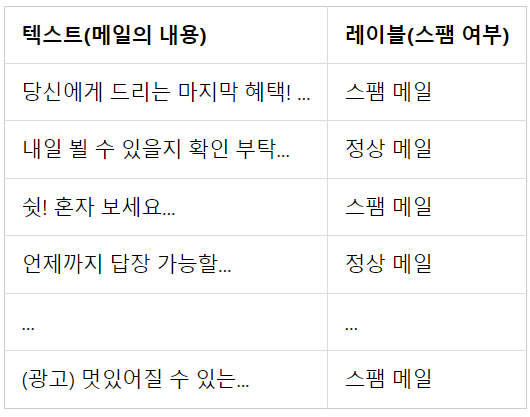

20,000개의 메일 샘플을 가진 이 데이터는 메일의 내용을 담고 있는 텍스트 데이터와 이 데이터가 스팸 메일인지 아닌지가 적혀있는 레이블. 두 가지 열로 이루어져있습니다. 기계가 이 20,000개의 메일 샘플 데이터를 학습했다고 해봅시다. 만약 데이터에 문제가 없고, 모델 또한 잘 설계되어져 있다면 학습이 다 된 이 모델은 훈련 데이터에 존재하지 않았던 어떤 메일 텍스트가 주어지더라도 정확한 레이블을 예측하게 됩니다.  
  
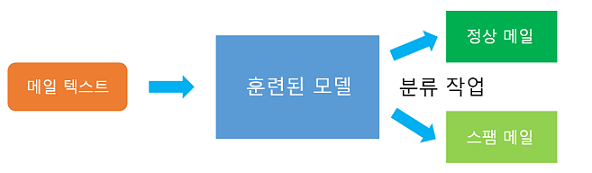

---
### **2. 훈련 데이터와 테스트 데이터**


위에서는 20,000개의 메일 샘플을 전부 훈련에 사용한다고 했지만 사실 갖고있는 전체 데이터를 전부 훈련에 사용하는 것 보다는 테스트용은 일부 남겨놓는 것으로 바람직합니다. 예를 들어 20,000개의 샘플 중 18,000개의 샘플은 훈련용으로 사용하고, 2,000개의 샘플은 테스트용으로 보류한 채 훈련 과정에서는 사용하지 않을 수 있습니다. 그 후 훈련이 끝나면, 보류해두었던 2,000개의 테스트용 샘플로 모델에게 레이블은 보여주지 않고, 모델에게 레이블을 맞춰보라고 요구한 뒤, 채점을 통해 정확도(accuracy)를 계산할 수 있습니다.

이번 챕터에서는 갖고 있는 데이터 중 분류 대상인 텍스트 데이터의 열을 X, 레이블 데이터의 열을 y라고 명명합니다. 그리고 이를 훈련 데이터(X_train, y_train)와 테스트 데이터(X_test, y_test)로 분리합니다. 모델은 X_train과 y_train을 학습하고, X_test에 대해서 레이블을 예측하게 됩니다. 그리고 모델이 예측한 레이블과 y_test를 비교해서 정확도를 계산합니다.

---
### **3. 단어에 대한 정수 부여**

케라스의 Embedding()은 단어 각각에 대해 정수로 변환된 입력에 대해서 임베딩 작업을 수행합니다.

단어 각각에 숫자 맵핑, 정수를 부여하는 방법으로는 정수 인코딩 챕터에서와 같이 단어를 빈도수 순대로 정렬하고 순차적으로 정수를 부여하는 방법이 있습니다. 로이터 뉴스 분류하기와 IMDB 리뷰 감성 분류하기 실습에서도 이 방법을 사용하였으며, 해당 실습에서 사용할 데이터들은 이미 이 작업이 끝난 상태입니다.

등장 빈도 순으로 단어를 정렬하여 정수를 부여하였을 때의 장점은 등장 빈도수가 적은 단어의 제거입니다. 예를 들어서 25,000개의 단어가 있다고 가정하고, 해당 단어를 등장 빈도수 순가 높은 순서로 1부터 25,000까지 정수를 부여했다고 해보겠습니다. 이렇게 되면 등장 빈도 순으로 등수가 부여된 것과 다름없으므로 전처리 작업에서 1,000보다 큰 정수로 맵핑된 단어들을 제거한다면 등장 빈도 상위 1,000개의 단어만 남길 수 있습니다.

---
### 4. **RNN으로 분류하기**

```python
    model.add(SimpleRNN(hidden_units, input_shape=(timesteps, input_dim)))
```

RNN 코드의 인자는 다음과 같습니다.  

* hidden_units = RNN의 출력의 크기 = 은닉 상태의 크기.  
* timesteps = 시점의 수 = 각 문서에서의 단어 수.  
* input_dim = 입력의 크기 = 임베딩 벡터의 차원.  

---
### **5. RNN의 다-대-일(Many-to-One) 문제**

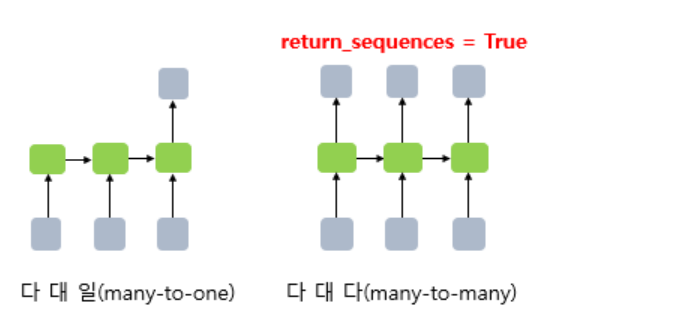

텍스트 분류는 RNN의 다 대 일(many-to-one) 문제에 속합니다. 즉, 텍스트 분류는 모든 시점(time step)에 대해서 입력을 받지만 최종 시점의 RNN 셀만이 은닉 상태를 출력하고, 이것이 출력층으로 가서 활성화 함수를 통해 정답을 고르는 문제가 됩니다.
  
이때 두 개의 선택지 중에서 정답를 고르는 이진 분류(Binary Classification) 문제라고 하며, 세 개 이상의 선택지 중에서 정답을 고르는 다중 클래스 분류(Multi-Class Classification) 문제라고 합니다. 이 두 문제에서는 각각 문제에 맞는 활성화 함수와 손실 함수를 사용해야 합니다.

이진 분류의 문제의 경우 출력층의 활성화 함수로 시그모이드 함수를, 손실 함수로 binary_crossentropy를 사용합니다. 반면, 다중 클래스 문제라면 출력층의 활성화 함수로 소프트맥스 함수를, 손실 함수로 categorical_crossentropy를 사용합니다. 또한, 다중 클래스 분류 문제의 경우에는 클래스가 N개라면 출력층에 해당되는 밀집층(dense layer)의 크기는 N으로 합니다. 다르게 표현하면 출력층 뉴런의 수는 N개입니다.

이번 챕터에서 스팸 메일 분류하기나 감성 분류하기 실습들이 이진 분류 문제에 해당되며, 로이터 뉴스 분류하기 문제가 다중 클래스 분류 문제에 해당됩니다.

마지막 편집일시 : 2022년 11월 14일 3:08 오후